In [29]:
import pandas as pd
import numpy as np

In [30]:
aapl = pd.read_csv('../cleaned_data/Nasdaq/AAPL.csv')
spx = pd.read_csv('../cleaned_data/SPX.csv')

In [31]:
df = pd.DataFrame({
    "AAPL_Close": aapl["Close"],
    "SPX_Close": spx["Close"]
})
df.head(10)

,AAPL_Close,SPX_Close
0,6.431896,1132.989990
1,6.443016,1136.520020
2,6.340531,1137.140015
3,6.328812,1141.689941
4,6.370885,1144.979980
5,6.314685,1146.979980
6,6.242855,1136.219971
7,6.330915,1145.680054
8,6.294247,1148.459961
9,6.189058,1136.030029


In [32]:
returns = df.pct_change().dropna()
returns.head(10)

,AAPL_Close,SPX_Close
1,0.001729,0.003116
2,-0.015906,0.000546
3,-0.001848,0.004001
4,0.006648,0.002882
5,-0.008821,0.001747
6,-0.011375,-0.009381
7,0.014106,0.008326
8,-0.005792,0.002426
9,-0.016712,-0.010823
10,0.044238,0.012500


In [33]:
cov_matrix = returns.cov()
beta = cov_matrix.loc["AAPL_Close", "SPX_Close"] / cov_matrix.loc["SPX_Close", "SPX_Close"]
print("Beta (AAPL vs SPX):", beta)

Beta (AAPL vs SPX): 1.1226045867790317


In [34]:
import statsmodels.api as sm

X = sm.add_constant(returns["SPX_Close"])
y = returns["AAPL_Close"]  

model = sm.OLS(y, X).fit()
print(model.summary())

beta = model.params["SPX_Close"]
alpha = model.params["const"]

print(f"Alpha: {alpha}, Beta: {beta}")

                            OLS Regression Results                            
Dep. Variable:             AAPL_Close   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     3591.
Date:                Sat, 11 Oct 2025   Prob (F-statistic):               0.00
Time:                        18:03:36   Log-Likelihood:                 11423.
No. Observations:                3895   AIC:                        -2.284e+04
Df Residuals:                    3893   BIC:                        -2.283e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.000      2.371      0.0

In [35]:
import matplotlib.pyplot as plt

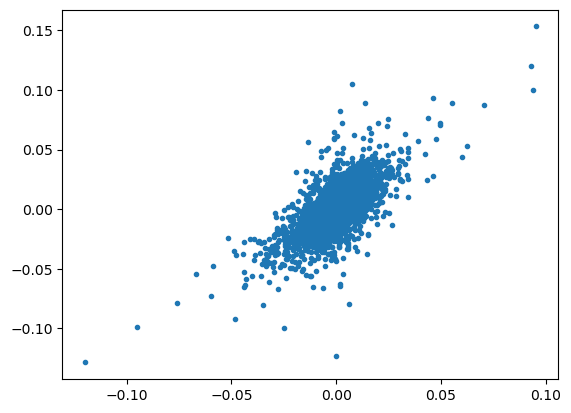

In [36]:
plt.plot(returns['SPX_Close'],returns['AAPL_Close'],'.')

In [37]:
returns['AAPL_Prediction'] = returns['SPX_Close']*beta + alpha

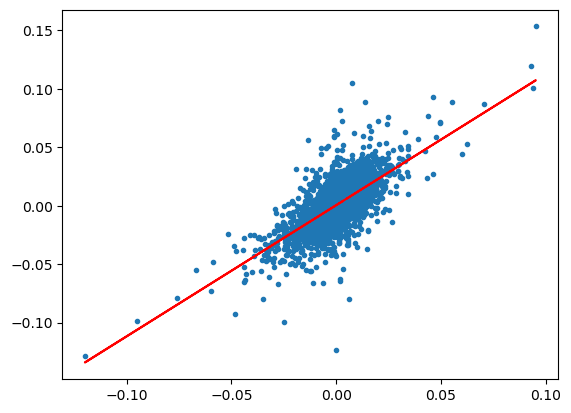

In [38]:
plt.plot(returns['SPX_Close'],returns['AAPL_Close'],'.')
plt.plot(returns['SPX_Close'],returns['AAPL_Prediction'],'r')
plt.show()

In [39]:
returns['Residual']=returns['AAPL_Close'] - returns['AAPL_Prediction']
returns['Residual']

1      -0.002259
2      -0.017009
3      -0.006830
4       0.002922
5      -0.011273
          ...   
3891   -0.018931
3892    0.005804
3893   -0.012272
3894   -0.005951
3895    0.014052
Name: Residual, Length: 3895, dtype: float64

<Axes: >

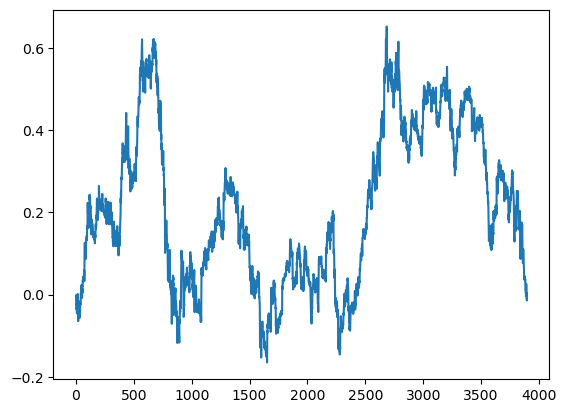

In [40]:
returns['Residual'].cumsum().plot()

<Axes: >

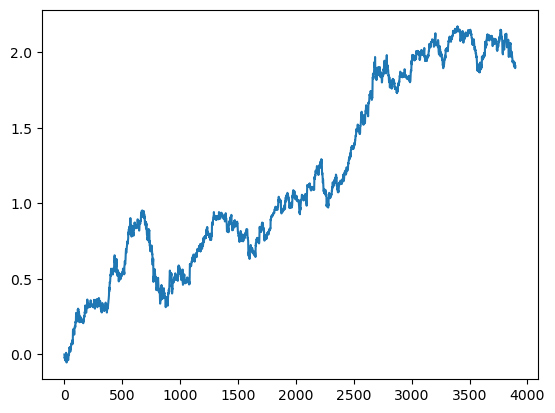

In [41]:
returns['EX'] = returns['AAPL_Close'] - beta*returns['SPX_Close']
returns['EX'].cumsum().plot()

In [42]:
returns['EX'].corr(returns['SPX_Close'])

9.718523557834522e-17